# Minalyze: Geochemistry

In [37]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('../data/OOLDEA2_1m_intervals.csv')

In [39]:
df.tail()

,id,result_master_id,DDH_name,from_m,to_m,Sample_Length_m,Scan_Length_m,Scan_Recovery_pct,Comp(c/s),Rayl(c/s),...,Ce_ppm,Ce_2SE_ppm,Ce_mdl_ppm,Pb_pct,Pb_2SE_pct,Pb_mdl_pct,U_ppm,U_2SE_ppm,U_mdl_ppm,minaloggerlink
151,69383,38,OOLDEA2,164,165,1,0.9415,94.15,1656.487,520.2108,...,189.02,22.34,23.80,0.0,0.0011,0.0017,20.35,9.04,12.86,https://minalogger.com/viewer/?project=WESTERN...
152,69384,38,OOLDEA2,165,166,1,0.8726,87.26,1544.148,524.4318,...,211.75,23.87,25.67,0.0,0.0000,0.0000,19.08,9.80,14.40,https://minalogger.com/viewer/?project=WESTERN...
153,69385,38,OOLDEA2,166,167,1,0.7751,77.51,1957.022,561.2939,...,117.73,25.62,26.52,0.0,0.0013,0.0019,32.09,10.72,15.23,https://minalogger.com/viewer/?project=WESTERN...
154,69386,38,OOLDEA2,167,168,1,0.8018,80.18,1702.285,545.7176,...,212.74,25.77,27.18,0.0,0.0013,0.0019,21.36,10.30,15.11,https://minalogger.com/viewer/?project=WESTERN...
155,69387,38,OOLDEA2,168,169,1,0.7051,70.51,1184.426,468.7084,...,199.32,25.92,28.52,0.0,0.0000,0.0000,0.00,11.65,17.69,https://minalogger.com/viewer/?project=WESTERN...


In [40]:
df.columns

Index(['id', 'result_master_id', 'DDH_name', 'from_m', 'to_m',
       'Sample_Length_m', 'Scan_Length_m', 'Scan_Recovery_pct', 'Comp(c/s)',
       'Rayl(c/s)', 'LT(secs)', 'Al_pct', 'Al_2SE_pct', 'Al_mdl_pct', 'Si_pct',
       'Si_2SE_pct', 'Si_mdl_pct', 'P_ppm', 'P_2SE_ppm', 'P_mdl_ppm', 'S_pct',
       'S_2SE_pct', 'S_mdl_pct', 'Cl_ppm', 'Cl_2SE_ppm', 'Cl_mdl_ppm', 'K_pct',
       'K_2SE_pct', 'K_mdl_pct', 'Ca_pct', 'Ca_2SE_pct', 'Ca_mdl_pct',
       'Ti_ppm', 'Ti_2SE_ppm', 'Ti_mdl_ppm', 'V_ppm', 'V_2SE_ppm', 'V_mdl_ppm',
       'Cr_ppm', 'Cr_2SE_ppm', 'Cr_mdl_ppm', 'Mn_ppm', 'Mn_2SE_ppm',
       'Mn_mdl_ppm', 'Fe_pct', 'Fe_2SE_pct', 'Fe_mdl_pct', 'Ni_ppm',
       'Ni_2SE_ppm', 'Ni_mdl_ppm', 'Cu_pct', 'Cu_2SE_pct', 'Cu_mdl_pct',
       'Zn_pct', 'Zn_2SE_pct', 'Zn_mdl_pct', 'Ga_ppm', 'Ga_2SE_ppm',
       'Ga_mdl_ppm', 'As_ppm', 'As_2SE_ppm', 'As_mdl_ppm', 'Se_ppm',
       'Se_2SE_ppm', 'Se_mdl_ppm', 'Rb_ppm', 'Rb_2SE_ppm', 'Rb_mdl_ppm',
       'Sr_ppm', 'Sr_2SE_ppm', 'Sr_mdl_ppm', 'Y_

In [41]:
var_str = list( df.columns )

features = (
    [i for i, s in enumerate(var_str) if "pct" in s 
        and "mdl" not in s 
        and "2SE" not in s] + 
    [i for i, s in enumerate(var_str) if "ppm"  in s 
        and "mdl" not in s 
        and "2SE" not in s]
        )

df_features = df.iloc[:,features[1:]]

df_features.head()


,Al_pct,Si_pct,S_pct,K_pct,Ca_pct,Fe_pct,Cu_pct,Zn_pct,Pb_pct,P_ppm,...,Rb_ppm,Sr_ppm,Y_ppm,Zr_ppm,Nb_ppm,Mo_ppm,Ba_ppm,La_ppm,Ce_ppm,U_ppm
0,2.4882,22.3157,0.3293,2.1815,1.1516,4.6119,0.0047,0.0069,0.0029,0.0,...,110.82,183.08,17.90,246.13,0.0,0,564.78,144.19,87.31,22.97
1,5.4625,23.3913,1.5906,2.0354,4.2996,5.9728,0.0047,0.0060,0.0030,0.0,...,101.26,186.29,25.48,241.73,0.0,0,748.25,98.25,70.23,20.18
2,2.9798,23.6034,1.0650,2.4316,2.5947,5.0235,0.0066,0.0052,0.0032,0.0,...,124.88,202.79,9.16,265.10,0.0,0,496.97,88.25,113.00,31.67
3,4.0648,19.1905,0.0773,1.8808,1.1856,3.2593,0.0040,0.0035,0.0036,0.0,...,104.59,158.59,0.00,200.86,0.0,0,367.05,57.82,73.96,24.23
4,3.4820,15.7049,0.2257,2.0808,0.9481,3.2247,0.0041,0.0038,0.0039,0.0,...,151.94,129.75,18.43,171.48,0.0,0,618.33,0.00,94.63,22.88


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#pca = PCA(n_components = 3)
#X = pca.fit_transform(df_features)

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])
X=pipeline.fit_transform(df_features)

In [43]:
def plot_pca(X, mode="2D"):

    if mode.lower() == "2d":

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, aspect='equal')

        ax.scatter(X[:, 0], X[:, 1], alpha=.5, s=60)

        ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
        ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
        ax.set_xlabel("$pca_1$", fontsize=18)
        ax.set_ylabel("$pca_2$", fontsize=18)
        ax.grid(True)

    elif mode.lower() == "3d":

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X[:, 0], X[:, 1],  X[:, 2],  alpha=.4, s=60)
        ax.view_init(25, -50)

        ax.set_xlabel("$pca_1$", fontsize=18)
        ax.set_ylabel("$pca_2$", fontsize=18)
        ax.set_zlabel("$pca_3$", fontsize=18)
        ax.grid(True)

    else:

        print('Unknown mode: please specify as 2D or 3D')


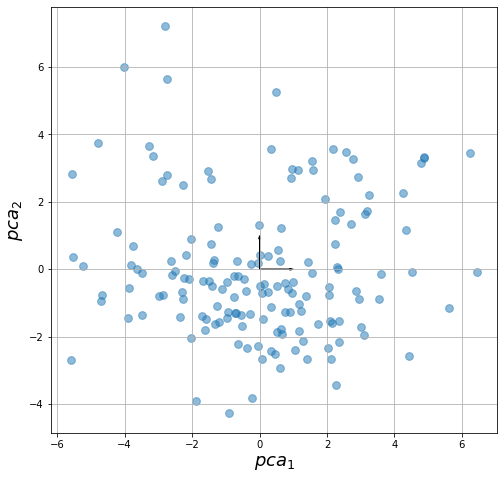

In [44]:
plot_pca( X )

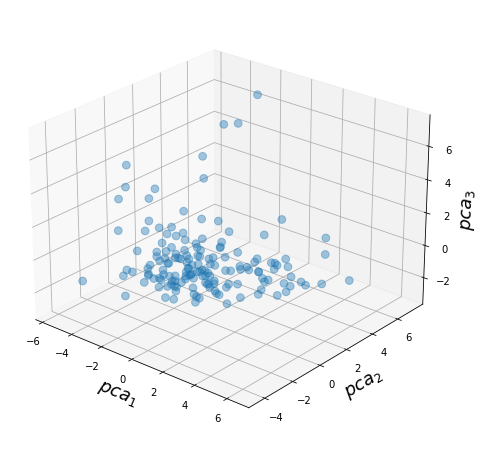

In [45]:
plot_pca( X, mode="3D")

## K-Means

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
                
inertias = [model.inertia_ for model in kmeans_per_k]

In [48]:
def  elbow_plot(inertias):
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, len(inertias)+1), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.annotate('Elbow',
                xy=(3, inertias[2]),
                xytext=(0.55, 0.55),
                textcoords='figure fraction',
                fontsize=16,
                arrowprops=dict(facecolor='black', shrink=0.1)
                )

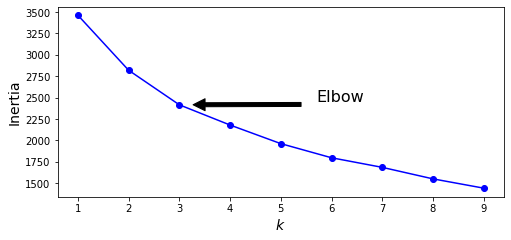

In [49]:
elbow_plot(inertias)

In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

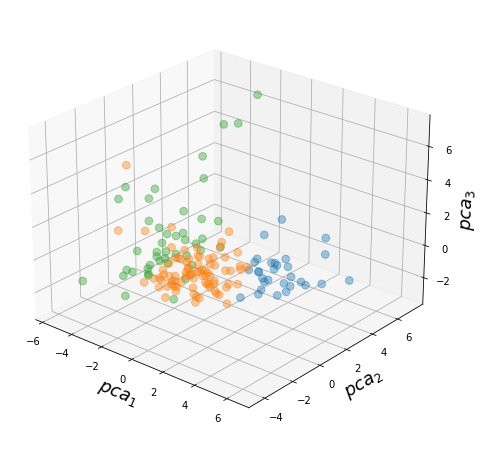

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for iter in range(3):
    ax.scatter(X[y_pred == iter, 0], X[y_pred == iter, 1],  X[y_pred == iter, 2], alpha=.4, s=60)

ax.view_init(25, -50)

ax.set_xlabel("$pca_1$", fontsize=18)
ax.set_ylabel("$pca_2$", fontsize=18)
ax.set_zlabel("$pca_3$", fontsize=18)
ax.grid(True)


## Hierarchical clustering

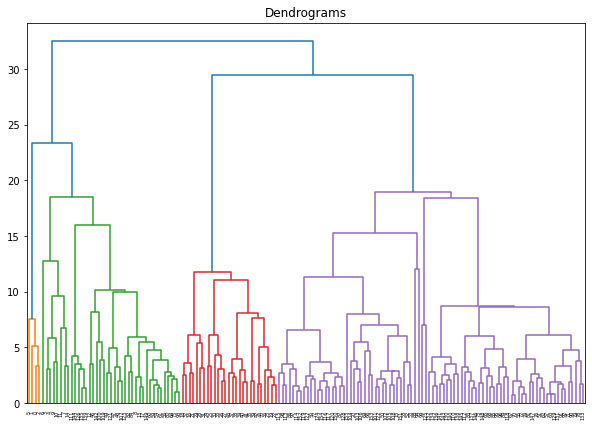

In [52]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize 

#X = sklearn.preprocessing.normalize(df_features)

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
dendro = shc.dendrogram(shc.linkage(X, method='ward'))

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', 
    linkage='ward', compute_full_tree=True, distance_threshold=20)  
lbl = cluster.fit_predict(X)

n = 1+np.amax(cluster.labels_)

print(f"Number of clusters = {n}")


Number of clusters = 4


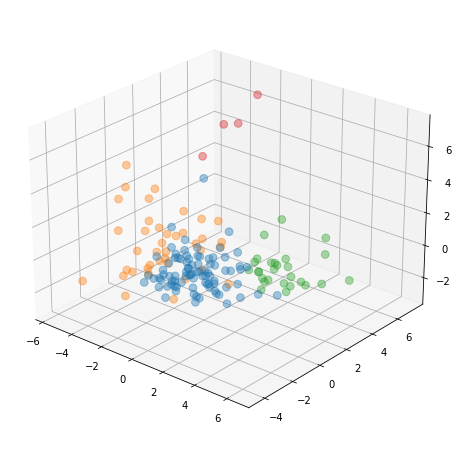

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for iter in range(n):
    ax.scatter(X[lbl == iter, 0], X[lbl == iter, 1],  X[lbl == iter, 2], alpha=.4, s=60)

ax.view_init(25, -50)